In [553]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [554]:
# read all the data
ccba = pd.read_csv('public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('public_train_x_remit1_full_hashed.csv')

#use train answer and public answer
public_x_alert_date = pd.read_csv('public_x_alert_date.csv')
train_x_alert_date = pd.read_csv('train_x_alert_date.csv')
alert_date = pd.concat([public_x_alert_date,train_x_alert_date])
# print(alert_date.shape)

public_y_answer = pd.read_csv('public_answer.csv')
train_y_answer = pd.read_csv('train_y_answer.csv')
y_answer = pd.concat([public_y_answer,train_y_answer])

## 觀察樣本 0 與 1 個數

In [555]:
print(train_y_answer)
print(train_y_answer['sar_flag'].value_counts())

       alert_key  sar_flag
0         171189         0
1         171202         0
2         171599         0
3         171737         0
4         171142         0
...          ...       ...
23901     352132         0
23902     352125         0
23903     352080         0
23904     352075         0
23905     351927         0

[23906 rows x 2 columns]
0    23672
1      234
Name: sar_flag, dtype: int64


## 資料平衡

In [556]:
# sample 0 and 1 to balance way 1 (sample 10000)
temp = train_y_answer.loc[train_y_answer['sar_flag'] == 0]
temp2 = train_y_answer.loc[train_y_answer['sar_flag'] == 1]

train_y_answer_resampled = pd.concat([temp,temp2])
print(train_y_answer_resampled['sar_flag'].value_counts())
print(train_y_answer_resampled)

0    23672
1      234
Name: sar_flag, dtype: int64
       alert_key  sar_flag
0         171189         0
1         171202         0
2         171599         0
3         171737         0
4         171142         0
...          ...       ...
23164     346021         1
23308     347051         1
23368     347894         1
23572     348724         1
23760     351367         1

[23906 rows x 2 columns]


In [557]:
# # sample 0 and 1 to balance way 2 (OverSampler)
# from imblearn.over_sampling import RandomOverSampler


# temp = train_y_answer['alert_key'].array.reshape(-1, 1)
# temp2 = train_y_answer['sar_flag'].array.reshape(-1, 1)

# # Randomly over sample the minority class
# ros = RandomOverSampler(random_state=42)
# temp_ros, temp2_ros= ros.fit_resample(temp, temp2)
# # Check the number of records after over sampling

# train_y_answer_resampled = pd.DataFrame({
#     'alert_key':temp_ros.flatten(),
#     'sar_flag':temp2_ros.flatten()
# })
# print(train_y_answer_resampled)
# print(train_y_answer_resampled['sar_flag'].value_counts())

In [558]:
# # # sample 0 and 1 to balance way 3 (UnderSampler)
# from imblearn.under_sampling import RandomUnderSampler

# temp = train_y_answer['alert_key'].array.reshape(-1, 1)
# temp2 = train_y_answer['sar_flag'].array.reshape(-1, 1)

# rus = RandomUnderSampler(random_state=0)
# temp_ros, temp2_ros= rus.fit_resample(temp, temp2)

# train_y_answer_resampled = pd.DataFrame({
#     'alert_key':temp_ros.flatten(),
#     'sar_flag':temp2_ros.flatten()
# })
# print(train_y_answer_resampled)
# print(train_y_answer_resampled['sar_flag'].value_counts())

In [559]:
def check_csv(df):
    print(df.head(),'\n',"shape = :",df.shape)
    print(df.isnull().sum())

In [560]:
df = pd.merge(alert_date,train_y_answer_resampled)

check_csv(df)

   alert_key  date  sar_flag
0     171189     0         0
1     171202     0         0
2     171599     0         0
3     171737     0         0
4     171142     0         0 
 shape = : (23906, 3)
alert_key    0
date         0
sar_flag     0
dtype: int64


## check every csv 

In [561]:
check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   usgam  clamt  csamt  inamt  cucsm  cucah  
0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0   
 shape = : (59075, 10)
cust_id    0
lupay      0
byymm      0
cycam      0
usgam      0
clamt      0
csamt      0
inamt      0
cucsm      0
cucah      0
dtype: int64


In [562]:
temp = ccba.drop(['usgam','clamt','csamt','cucah'],axis=1)
ccba = temp
check_csv(ccba)

                                             cust_id  lupay  byymm     cycam  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0      0  152628.0   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     30  152628.0   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     61  152628.0   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0     91  152628.0   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...    0.0    122  152628.0   

   inamt  cucsm  
0    0.0    0.0  
1    0.0    0.0  
2    0.0    0.0  
3    0.0    0.0  
4    0.0    0.0   
 shape = : (59075, 6)
cust_id    0
lupay      0
byymm      0
cycam      0
inamt      0
cucsm      0
dtype: int64


In [563]:
check_csv(cdtx)

                                             cust_id  date  country  cur_type  \
0  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...     1      130        47   
1  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
2  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    10      130        47   
3  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    13      130        47   
4  0174dff6a8a2038f9966d61d8450e19e3bd751e4051c2a...    15      130        47   

      amt  
0  2312.0  
1   808.0  
2  7099.0  
3   306.0  
4   255.0   
 shape = : (1043014, 5)
cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64


In [564]:
# temp = cdtx.drop(['country','cur_type'],axis=1).groupby(['cust_id','date'],as_index=False)['amt'].sum()
temp = cdtx.groupby(['cust_id','date','country','cur_type'],as_index=False)['amt'].sum()
cdtx = temp
check_csv(cdtx)

                                             cust_id  date  country  cur_type  \
0  0015cc01f553512007705edf855baa16f1b57a16fb107e...    21      130        47   
1  0015cc01f553512007705edf855baa16f1b57a16fb107e...    52      130        47   
2  0015cc01f553512007705edf855baa16f1b57a16fb107e...    56      130        47   
3  0015cc01f553512007705edf855baa16f1b57a16fb107e...    59      130        47   
4  0015cc01f553512007705edf855baa16f1b57a16fb107e...    62      130        47   

       amt  
0  13428.0  
1    202.0  
2   3624.0  
3    175.0  
4    128.0   
 shape = : (455436, 5)
cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64


In [565]:
check_csv(custinfo)

   alert_key                                            cust_id  risk_rank  \
0     352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...          1   
1     352253  b212d14cb35676926682b2cf849e295d948888f556c07e...          1   
2     352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...          1   
3     352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...          3   
4     352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...          1   

   occupation_code  total_asset  AGE  
0             19.0    1465816.0    7  
1              2.0      98177.0    2  
2             19.0    2052922.0    7  
3             15.0     201906.0    5  
4             12.0       7450.0    5   
 shape = : (25751, 6)
alert_key            0
cust_id              0
risk_rank            0
occupation_code    116
total_asset          0
AGE                  0
dtype: int64


In [566]:
temp = custinfo.drop(['occupation_code','AGE'],axis=1)
custinfo = temp
check_csv(custinfo)

   alert_key                                            cust_id  risk_rank  \
0     352249  82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...          1   
1     352253  b212d14cb35676926682b2cf849e295d948888f556c07e...          1   
2     352254  e5b0002791c7852644a2730abeaa893cdf14a072ef7812...          1   
3     352280  74214c478dc6519fbefe4bc31693865bdcd698ab974b64...          3   
4     352282  0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...          1   

   total_asset  
0    1465816.0  
1      98177.0  
2    2052922.0  
3     201906.0  
4       7450.0   
 shape = : (25751, 4)
alert_key      0
cust_id        0
risk_rank      0
total_asset    0
dtype: int64


In [567]:
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_time  tx_type    tx_amt  exchg_rate  info_asset_code  fiscTxId  \
0       18        2   68265.0         1.0               16       NaN   
1       17        2  932058.0         1.0               16       NaN   
2       18        2    6089.0         1.0               16       NaN   
3       15        2  776715.0         1.0               16       NaN   
4       19        2   61630.0         1.0               16       NaN   

   txbranch  cross_bank  ATM  
0       NaN           0    0  
1       NaN           0    0  
2    

In [568]:
# too many Nan in 'fiscTxId' and 'txbranch' so we drop them
temp = dp.drop(['tx_time','exchg_rate','fiscTxId','txbranch'],axis=1)
temp.dropna(axis='index',inplace=True)
# then we drop columns
# 當天交易總額
temp.groupby(['cust_id','tx_date'])['tx_amt'].sum()
dp = temp
check_csv(dp)

                                             cust_id debit_credit  tx_date  \
0  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       36   
1  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       42   
2  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       39   
3  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       49   
4  0172056578071e83399216fcd640bdc4de4583149d0fd9...           CR       70   

   tx_type    tx_amt  info_asset_code  cross_bank  ATM  
0        2   68265.0               16           0    0  
1        2  932058.0               16           0    0  
2        2    6089.0               16           0    0  
3        2  776715.0               16           0    0  
4        2   61630.0               16           0    0   
 shape = : (1947803, 8)
cust_id            0
debit_credit       0
tx_date            0
tx_type            0
tx_amt             0
info_asset_code    0
cross_bank         0
ATM              

In [569]:
check_csv(remit)

                                             cust_id  trans_date  trans_no  \
0  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         148         0   
1  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         165         0   
2  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         231         0   
3  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         291         0   
4  01b1735c3dbf0a35c1c989bb45434ce4326b365b73db06...         389         0   

   trade_amount_usd  
0          100528.0  
1          100528.0  
2           89479.0  
3          100528.0  
4           30158.0   
 shape = : (17167, 4)
cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64


In [570]:
# temp = remit.drop(['trans_no'],axis=1)
temp = remit
#交易總額
temp = temp.groupby(['cust_id','trans_date'],as_index=False)['trade_amount_usd'].sum()
remit = temp
check_csv(remit)

                                             cust_id  trans_date  \
0  002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de805...         153   
1  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         223   
2  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         312   
3  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         328   
4  0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155...         356   

   trade_amount_usd  
0          343647.0  
1            6071.0  
2           60024.0  
3          531413.0  
4            2109.0   
 shape = : (15413, 3)
cust_id             0
trans_date          0
trade_amount_usd    0
dtype: int64


## Merge csv

In [571]:
def merge_csv(df):
    # merge custinfo to get alert_key with custid and get more information
    df = pd.merge(df,custinfo,on='alert_key',how='left')
    # print(df.head(),'\n',df.shape)
    # print(df.isnull().sum())

    # merge ccba on cust_id and date
    temp = pd.merge(df,ccba.rename(columns={'byymm':'date'}),on=['cust_id','date'],how='left')
    # print(temp.head(),'\n',temp.shape)
    # print(temp.isnull().sum())
    df = temp

    # merge cdtx on cust_id and date
    temp = pd.merge(df,cdtx,on=['cust_id','date'],how='left')
    df = temp

    # merge dp on cust_id and date
    temp = pd.merge(df,dp.rename(columns={'tx_date':'date'}),on=['cust_id','date'],how='left')
    #turn 'debit_credit' into dummy variables
    temp = pd.get_dummies(temp, columns=['debit_credit'])
    df = temp

    # merge remit on cust_id and date
    temp = pd.merge(df,remit.rename(columns={'trans_date':'date'}),on=['cust_id','date'],how='left')
    df = temp

    # fill all Nan
    df.fillna(0,inplace=True)
    # print(df.head(),'\n',df.shape)
    # print(df.isnull().sum())
    
    return df

df = merge_csv(df)
check_csv(df)

   alert_key  date  sar_flag  \
0     171189     0         0   
1     171189     0         0   
2     171189     0         0   
3     171202     0         0   
4     171202     0         0   

                                             cust_id  risk_rank  total_asset  \
0  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
1  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
2  972ee157e63316e8a50dd489bc93730a3ee8a8959d5c6b...          1     375576.0   
3  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3    2717416.0   
4  a10ab33f90926fb18d7bb5e78034d7f04a1fbed95b7951...          3    2717416.0   

     lupay     cycam  inamt     cucsm  ...  cur_type    amt  tx_type   tx_amt  \
0  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0    309.0   
1  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0   1020.0   
2  85428.0  301224.0    0.0  151434.0  ...      47.0  673.0      2.0    186.0   
3 

## 檢查是否保留住所有alert_key

In [572]:
print("shape of 'df':",df.shape)
print("shape of 'df.groupby('alert_key').first()':",df.groupby('alert_key').first().shape)

shape of 'df': (182997, 21)
shape of 'df.groupby('alert_key').first()': (23906, 20)


## Print Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

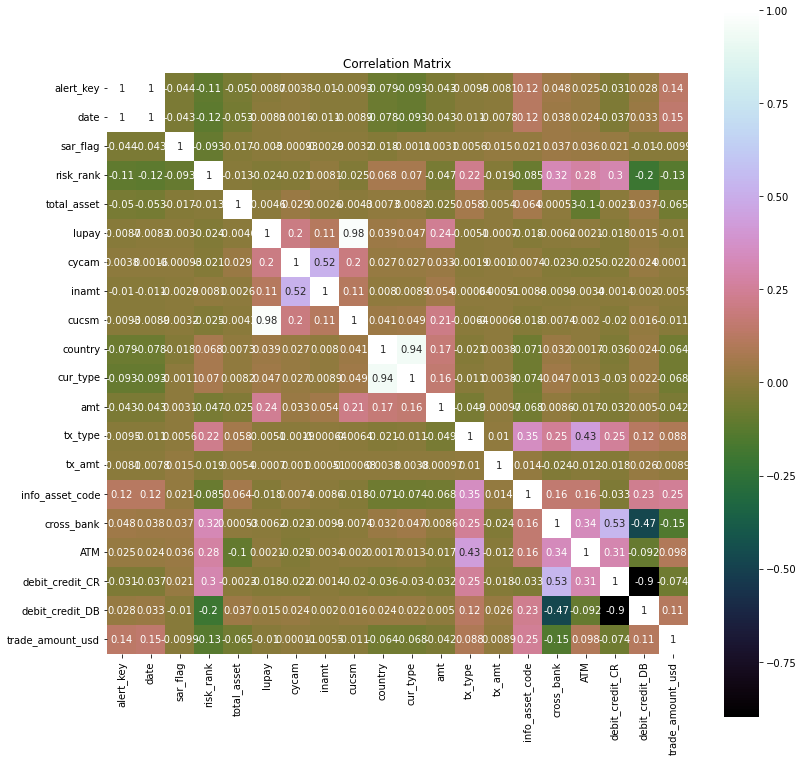

In [573]:
correlation = df.corr()
plt.figure(figsize=(13,13))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## 訓練資料處理

In [574]:
# drop 'cust_id' and 'alert_key'
X_ak = df['alert_key']
df.drop(['cust_id','alert_key'],axis=1,inplace=True)

# train test split
X = df.drop(['sar_flag'], axis=1)
Y = df['sar_flag']

from sklearn import preprocessing
#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X=minmax_scale.fit_transform(X)

## 模型精準度測試

In [575]:
from sklearn import metrics
def print_acc(expected,predicted):
    print(metrics.classification_report(expected,predicted))
    print(metrics.confusion_matrix(expected, predicted))
    accuracy = accuracy_score(expected, predicted)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    # print("Average = macro")
    print('precision:',metrics.precision_score(expected, predicted,average='macro')) 
    print('recall:',metrics.recall_score(expected, predicted,average='macro'))
    print('F1-score:',metrics.f1_score(expected, predicted,average='macro'))

## 直接call model

In [576]:

# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import KFold

# # kfold = KFold(10)
# model = OneVsRestClassifier(SVC(gamma='auto',kernel='sigmoid',max_iter=50,probability=True,verbose=True))

# for train,valid in kfold.split(df):
#     X_train = X.iloc[train]
#     Y_train = Y.iloc[train]

# model.fit(X,Y)


In [577]:
# predicted = model.predict(X).round(7)
# print_acc(Y,predicted)

## 自己兜一個model

In [578]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.05, random_state=42)

# X_train,Y_train = SMOTE(random_state=42).fit_resample(X_train,Y_train)

In [579]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import ModelCheckpoint

input_dim = X_train.shape[1]
batch_size = int(X_train.shape[0] / 500)
epochs = 100
train = 1
load = 0
weight_path = 'fourth_try_weights_best.hdf5'

model = Sequential()
model.add(Dense(input_dim=input_dim,units=100,activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(units=50,activation=keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


if load == 1:
    model.load_weights(weight_path)

if train == 1:
    # checkpoint
    checkpoint = ModelCheckpoint(weight_path, monitor='loss', verbose=1, save_best_only=True,mode='min')
    callbacks_list = [checkpoint]
    #Train model
    model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0,callbacks=callbacks_list)
else:
    model.load_weights(weight_path)

Epoch 1/100
472/501 [===========================>..] - ETA: 0s - loss: 0.0965 - accuracy: 0.9835
Epoch 1: loss improved from inf to 0.09483, saving model to fourth_try_weights_best.hdf5
501/501 [==============================] - 2s 2ms/step - loss: 0.0948 - accuracy: 0.9836
Epoch 2/100
481/501 [===========================>..] - ETA: 0s - loss: 0.0716 - accuracy: 0.9835
Epoch 2: loss improved from 0.09483 to 0.07138, saving model to fourth_try_weights_best.hdf5
501/501 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9836
Epoch 3/100
477/501 [===========================>..] - ETA: 0s - loss: 0.0694 - accuracy: 0.9837
Epoch 3: loss improved from 0.07138 to 0.06967, saving model to fourth_try_weights_best.hdf5
501/501 [==============================] - 1s 1ms/step - loss: 0.0697 - accuracy: 0.9836
Epoch 4/100
480/501 [===========================>..] - ETA: 0s - loss: 0.0682 - accuracy: 0.9837
Epoch 4: loss improved from 0.06967 to 0.06838, saving model to fourth

In [580]:
model.load_weights(weight_path)

In [581]:
predicted = model.predict(X_valid).round()
# print(type(predicted))
# 小數點後7位四捨五入至1
# for i in range(len(predicted)):
#     if predicted[i] >= 0.00000005:
#         predicted[i]=1
#     else:
#         predicted[i]=0

print_acc(Y_valid,predicted)

286/286 [==============================] - 0s 689us/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8991
           1       0.96      0.27      0.42       159

    accuracy                           0.99      9150
   macro avg       0.97      0.64      0.71      9150
weighted avg       0.99      0.99      0.98      9150

[[8989    2]
 [ 116   43]]
Accuracy: 98.71%
precision: 0.9714076514735493
recall: 0.635108903452719
F1-score: 0.7075239246892391


### 提交符合範例的csv檔案

In [582]:
df2 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)

df2 = pd.merge(df2,alert_date,on='alert_key',how='left')

df2 = pd.merge(df2,public_y_answer,how='left')
df2.fillna(0,inplace=True)

# print(df2.head(),'\n',df2.shape)
# print(df2.isnull().sum())
print(df2['sar_flag'].value_counts())

0.0    3839
1.0      11
Name: sar_flag, dtype: int64


In [583]:
df2 = merge_csv(df2)

# save alert key
df2_ak = df2['alert_key']

## 檢查是否保留所有alert_key

In [438]:
print("shape of 'df2.groupby('alert_key').first()':",df2.groupby('alert_key').first().shape)

shape of 'df2.groupby('alert_key').first()': (3850, 14)


In [584]:
# drop 'cust_id' and 'alert_key'
df2.drop(['cust_id','alert_key'],axis=1,inplace=True)

X_test = df2.drop(['sar_flag'], axis=1)
Y_test = df2['sar_flag']

#Feature Normalization
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
X_test =minmax_scale.fit_transform(X_test)

## 檢查精準度

In [586]:
predicted = model.predict(X_test).round()

# for i in range(len(predicted)):
#     if predicted[i] >= 0.00000005:
#         predicted[i]=1
#     else:
#         predicted[i]=0
        
print_acc(Y_test,predicted)

504/504 [==============================] - 0s 736us/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16036
         1.0       0.00      0.00      0.00        79

    accuracy                           1.00     16115
   macro avg       0.50      0.50      0.50     16115
weighted avg       0.99      1.00      0.99     16115

[[16035     1]
 [   79     0]]
Accuracy: 99.50%
precision: 0.49754871540275536
recall: 0.49996882015465205
F1-score: 0.49875583203732504


## 製作csv

In [587]:
ans_y = model.predict(X_test).flatten()

df3 = pd.DataFrame({
    "probability":ans_y
})
print(ans_y.shape)

final = pd.concat([df2_ak,df3],axis=1)
print(final.shape)

final = final.groupby('alert_key',as_index=False).max()
print(final.shape)
# 機率由大到小
final.sort_values(inplace=True,by=['probability'],ascending=False)
print(final)

final.to_csv('submission_fourth_try.csv', index=False)

504/504 [==============================] - 0s 723us/step
(16115,)
(16115, 2)
(3850, 2)
     alert_key   probability
186     354014  9.960697e-01
593     356605  3.956461e-01
344     355090  1.906680e-01
118     353248  1.746655e-01
793     357788  9.298865e-02
..         ...           ...
18      352332  1.069669e-36
56      352693  0.000000e+00
26      352476  0.000000e+00
71      352870  0.000000e+00
78      352886  0.000000e+00

[3850 rows x 2 columns]


In [ ]:
# df4 = pd.read_csv('預測的案件名單及提交檔案範例.csv').drop('probability',axis=1)
# print(df4)

In [ ]:
# temp = pd.merge(df4,final,on='alert_key',how='left').fillna(0)
# # 機率由大到小
# temp.sort_values(inplace=True,by=['probability'],ascending=False)
# temp.to_csv('submission_third_try.csv', index=False)
# print(temp)